In [1]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset
leads_data=pd.read_csv("C:/Users/akhil/Desktop/logical regression assignment/Lead Scoring Assignment/Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Data inspection:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads_data.shape

(9240, 37)

In [7]:
#lets check for null values if any:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
leads_data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [9]:
# Observations:
#The data types of the columns are float, integer and object type.
#We can see there are some null values in the column. Let's inspect the null values first.

In [10]:
lead_data.replace('Select', np.NaN,inplace=True)

NameError: name 'lead_data' is not defined

In [11]:
lead_data['Lead Profile'].value_counts()

NameError: name 'lead_data' is not defined

In [12]:
#Null Value Calculations:
#There are quite a few columns which has 'Select' as one of the category. 
#This is most probably because the person has not filled that field. 
#We will replace this field with NaN

Data Preparation
1. Missing Values:
Strategy: Deleting columns with more then 50% missing values and imputing missing values in categorical columns

In [13]:
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
#Each Columns are sorted according to Null Values
lead_data.isna().sum().sort_values(ascending=False)

NameError: name 'lead_data' is not defined

In [15]:
# Lets check according to % wise Null values
percent_null = leads_data.isnull().sum().sort_values(ascending=False)*100/len(leads_data)
percent_null[percent_null>0]

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [16]:
#Drop column with more then 50% missing values
len(leads_data)*.5

4620.0

In [17]:
# drop column 'How did you hear about X Education', 'Lead Quality' and 'Lead Profile'
leads_data.drop(['How did you hear about X Education','Lead Profile','Lead Quality'],axis=1,inplace=True)
leads_data.isna().sum().sort_values(ascending=False)

Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
Prospect ID                                         0
Through Recommendations                             0
I agree to pay the amount th

In [18]:
#Observation:
#The leads which were generated just after submitting the form, can also be dropped such as:All'Asymmetrique..'columns, Tags,Last Notable Activity
#as these are created post the Sales call with the Leads.

In [19]:
#Dropping columns:
leads_data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Tags','Last Notable Activity'],axis=1,inplace=True)

In [20]:
leads_data.isna().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
X Education Forums                                  0
Update me on Supply Chain Content                   0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article           

In [21]:
leads_data.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [22]:
#Observation:
#We can drop City column as well as most of the cities are of Maharashtra & rest are all null.

In [23]:
leads_data.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [24]:
#Observation:
#We can drop Country column as the highest response rate is from India.which is about 70%.
#27% are missing & rest 3% are other countries.

In [25]:
# Drop 'Country' and 'City'
leads_data.drop(['City','Country'],axis=1,inplace=True)
leads_data.isna().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
What is your current occupation                  2690
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Newspaper Article                                   0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Prospect ID                                         0
Magazine                                            0
Search                      

In [26]:
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
# drop column 'What matters most to you in choosing a course' as it has only one value in excess
leads_data.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [28]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#In Missing values to be Replaced in 'What is your current occupation' with 'Other' and add 'Housewife' and 'Businessman' to Others.

In [30]:
leads_data['What is your current occupation'].fillna('Others',inplace=True)
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(['Housewife','Businessman'],'Other')

In [31]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Others                  2690
Working Professional     706
Student                  210
Other                     34
Name: What is your current occupation, dtype: int64

In [32]:
lead_data.Specialization.value_counts()

NameError: name 'lead_data' is not defined

In [33]:
#observation:
#Impute missing values in 'Specialization' by 'Others' and convert 'Rural and Agribusiness' ,'E-Business' and 'Services Excellence' to Others.

In [54]:
leads_data.Specialization.fillna('Others',inplace=True)
leads_data.Specialization.replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Others',inplace=True)
leads_data.Specialization.value_counts()

Select                               1942
Others                               1608
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

In [55]:
leads_data.isna().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Lead Source                                  36
Prospect ID                                   0
Newspaper Article                             0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
X Education Forums                            0
What is your current occupation               0
Magazine                                      0
Search                                        0
Lead Number                                   0
Specialization                                0
Total Time Spent on Website                   0
Converted                               

In [56]:
leads_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [57]:
leads_data['Last Activity'].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [59]:
# Impute missing values in 'Last Activity' with mode 'Email Opened'
lead_data['Last Activity'].fillna('Email Opened',inplace=True)
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [60]:
#Here we Replace missing values in 'Lead Source' by 'Others' 
#Also add 'Facebook','bing','Click2call','Press_Release','Live Chat','Social Media','NC_EDM', 'testone','youtubechannel','welearnblog_Home','Pay per Click Ads','blog','WeLearn' columns to "Others'

In [61]:
leads_data['Lead Source'].mode()
leads_data['Lead Source'].fillna('Others',inplace=True)
leads_data['Lead Source'].replace('google','Google',inplace=True)
leads_data['Lead Source'].replace(['Facebook','bing','Click2call','Press_Release','Live Chat','Social Media','NC_EDM',
                                  'testone','youtubechannel','welearnblog_Home','Pay per Click Ads','blog','WeLearn'],
                                 'Others',inplace=True)
leads_data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others               114
Name: Lead Source, dtype: int64

In [62]:
leads_data.isna().sum().sort_values(ascending=False)

TotalVisits                                 137
Page Views Per Visit                        137
Last Activity                               103
Prospect ID                                   0
Magazine                                      0
I agree to pay the amount through cheque      0
Get updates on DM Content                     0
Update me on Supply Chain Content             0
Receive More Updates About Our Courses        0
Through Recommendations                       0
Digital Advertisement                         0
Newspaper                                     0
X Education Forums                            0
Newspaper Article                             0
What is your current occupation               0
Search                                        0
Lead Number                                   0
Specialization                                0
Total Time Spent on Website                   0
Converted                                     0
Do Not Call                             

# Skewed Data

In [34]:
leads_data[('Receive More Updates About Our Courses')].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [35]:
leads_data['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [36]:
leads_data['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [37]:
leads_data['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [40]:
leads_data.Magazine.value_counts()

No    9240
Name: Magazine, dtype: int64

In [41]:
leads_data.Search.value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [42]:
leads_data['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [43]:
leads_data['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [44]:
leads_data.Newspaper.value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [45]:
leads_data['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [46]:
leads_data['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [47]:
9226/9240

0.9984848484848485

In [48]:
# We can drop all the above columns as more then 99.8% entries have same value.
leads_data.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
               'I agree to pay the amount through cheque','Magazine','Search','Newspaper Article','X Education Forums',
               'Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [49]:
leads_data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [50]:
leads_data['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [51]:
#drop 'Do Not Call' column
leads_data.drop('Do Not Call',axis=1,inplace=True)

In [52]:
leads_data.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [53]:
leads_data['Total Time Spent on Website'].value_counts()

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [54]:
leads_data['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

Are Entries Unique? lets check

In [56]:
leads_data['Lead Number'].value_counts().sort_values(ascending=True)

660737    1
660321    1
660624    1
660727    1
660719    1
         ..
579615    1
579564    1
579546    1
580313    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64

In [57]:
leads_data['Prospect ID'].value_counts().sort_values(ascending=True)

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
30422ea1-36fe-465e-9e68-41ee190fefb3    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
c0b25922-511f-4c56-852e-ced210a45447    1
19d6451e-fcd6-407c-b83b-48e1af805ea9    1
82a7005b-7196-4d56-95ce-a79f937a158d    1
9fe0a3d6-404d-4ef8-99d8-ce2a4d858ed5    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9240, dtype: int64

In [60]:
# We either need  columns 'Prospect ID' or'Lead Number'. Since there is no much of ID's we would Proscpect ID here
# Drop 'Prospect ID'
leads_data.drop('Prospect ID',axis=1,inplace=True)

KeyError: "['Prospect ID'] not found in axis"

In [61]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          7802 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [62]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [63]:
list(leads_data.describe().columns)

['Lead Number',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [64]:
num=list(leads_data.describe().columns)[1:]
num

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [65]:
cat=list(leads_data.select_dtypes(include='object').columns)
cat

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview']

# Outliners

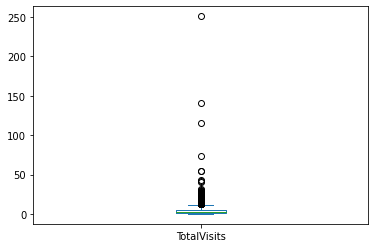

In [66]:
#checking outliners in numeric columns
leads_data['TotalVisits'].plot.box()
plt.show()

In [69]:
leads_data['TotalVisits'].quantile(0.99)

17.0

In [71]:
leads_data[leads_data['TotalVisits']>17]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
345,656743,Landing Page Submission,Organic Search,No,1,21.0,1113,2.63,Email Opened,Operations Management,Unemployed,Yes
469,655360,Landing Page Submission,Organic Search,No,0,22.0,59,5.50,Page Visited on Website,Human Resource Management,Unemployed,Yes
663,653687,Landing Page Submission,Google,No,1,21.0,1885,3.50,Email Opened,Business Administration,Unemployed,Yes
767,652507,API,Organic Search,No,0,19.0,415,4.75,Page Visited on Website,NaN,Others,No
896,650892,Landing Page Submission,Direct Traffic,No,1,18.0,59,2.57,Email Opened,Business Administration,Unemployed,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8619,583969,Landing Page Submission,Organic Search,No,0,18.0,264,6.00,SMS Sent,Human Resource Management,Unemployed,Yes
8624,583931,Landing Page Submission,Google,No,1,27.0,573,1.93,Page Visited on Website,Business Administration,Unemployed,Yes
8684,583534,API,Google,No,1,23.0,1341,2.09,SMS Sent,NaN,Others,No
8827,582560,Landing Page Submission,Organic Search,No,0,23.0,194,11.50,Email Opened,Finance Management,Unemployed,Yes


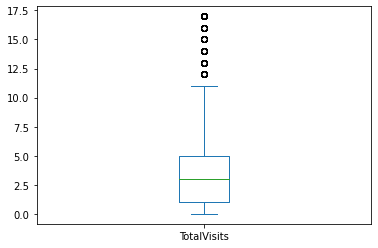

In [73]:
#apply capping on outliners in Total Visits:

q1=leads_data['TotalVisits'].quantile(0.01)
q2=leads_data['TotalVisits'].quantile(0.99)
leads_data.TotalVisits[leads_data.TotalVisits<q1]=q1
leads_data.TotalVisits[leads_data.TotalVisits>q2]=q2
leads_data['TotalVisits'].plot.box()
plt.show()

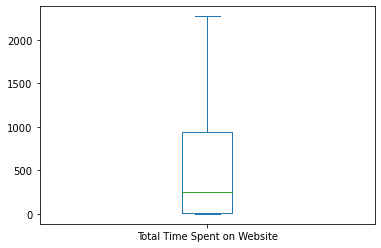

In [74]:
leads_data['Total Time Spent on Website'].plot.box()
plt.show()

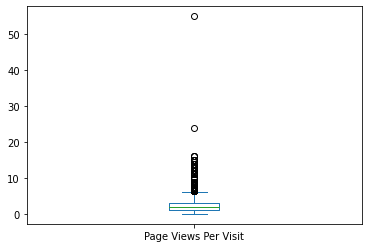

In [75]:
leads_data['Page Views Per Visit'].plot.box()
plt.show()

In [76]:
leads_data['Page Views Per Visit'].quantile(0.99)

9.0

In [77]:
leads_data[leads_data['Page Views Per Visit']>9]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
12,660562,API,Organic Search,No,1,11.0,1538,11.0,Email Opened,Marketing Management,Unemployed,No
56,659998,Landing Page Submission,Referral Sites,No,1,13.0,436,13.0,Form Submitted on Website,IT Projects Management,Unemployed,No
125,659241,API,Referral Sites,No,0,16.0,53,16.0,Olark Chat Conversation,NaN,Others,No
168,658756,Landing Page Submission,Referral Sites,No,0,12.0,493,12.0,Email Link Clicked,Marketing Management,Others,Yes
246,657882,API,Referral Sites,No,0,14.0,354,14.0,Unreachable,Select,Unemployed,No
...,...,...,...,...,...,...,...,...,...,...,...,...
8322,586343,Landing Page Submission,Organic Search,No,1,14.0,1584,14.0,SMS Sent,Travel and Tourism,Others,Yes
8381,585851,Landing Page Submission,Direct Traffic,No,0,10.0,793,10.0,Email Opened,Business Administration,Unemployed,Yes
8640,583774,Landing Page Submission,Organic Search,No,0,15.0,1042,15.0,SMS Sent,Retail Management,Unemployed,Yes
8827,582560,Landing Page Submission,Organic Search,No,0,17.0,194,11.5,Email Opened,Finance Management,Unemployed,Yes


In [78]:
leads_data['Page Views Per Visit'].quantile(0.95)

6.0

In [79]:
leads_data[leads_data['Page Views Per Visit']>6]

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
10,660608,Landing Page Submission,Organic Search,No,1,8.0,1351,8.0,Email Opened,Travel and Tourism,Unemployed,Yes
12,660562,API,Organic Search,No,1,11.0,1538,11.0,Email Opened,Marketing Management,Unemployed,No
41,660222,Landing Page Submission,Organic Search,Yes,0,7.0,38,7.0,Unsubscribed,Retail Management,Unemployed,Yes
56,659998,Landing Page Submission,Referral Sites,No,1,13.0,436,13.0,Form Submitted on Website,IT Projects Management,Unemployed,No
57,659963,API,Referral Sites,No,1,8.0,903,8.0,Page Visited on Website,Finance Management,Unemployed,No
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,580407,Landing Page Submission,Organic Search,No,0,9.0,82,9.0,Email Opened,Human Resource Management,Unemployed,Yes
9151,580278,Landing Page Submission,Google,No,0,7.0,133,7.0,SMS Sent,Marketing Management,Unemployed,No
9215,579802,Landing Page Submission,Organic Search,No,0,8.0,397,8.0,Email Opened,Business Administration,Others,Yes
9223,579755,API,Organic Search,No,0,7.0,142,7.0,Email Opened,Operations Management,Unemployed,Yes


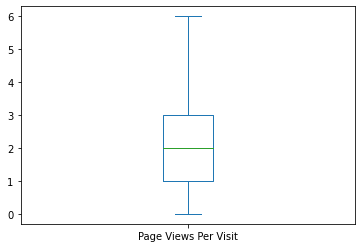

In [80]:
#Apply capping on Page Views Per Visit
q1=leads_data['Page Views Per Visit'].quantile(0.05)
q2=leads_data['Page Views Per Visit'].quantile(0.95)
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit']<q1]=q1
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit']>q2]=q2
leads_data['Page Views Per Visit'].plot.box()
plt.show()

In [81]:
##Imputing missing values in numeric columns.

In [82]:
leads_data.TotalVisits.describe()

count    9103.000000
mean        3.332747
std         3.252420
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [83]:
# Fill missing values in TotalVisits by median value '3'
leads_data.TotalVisits.fillna(3,inplace=True)

In [84]:
leads_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.258944
std         1.792536
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Page Views Per Visit, dtype: float64

In [85]:
# Impute missing values in 'Page Views Per Visit' by median '2'
leads_data['Page Views Per Visit'].fillna(2,inplace=True)

In [86]:
leads_data.isna().sum().sort_values(ascending=False)

Specialization                            1438
Last Activity                              103
Lead Source                                 36
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
What is your current occupation              0
A free copy of Mastering The Interview       0
dtype: int64

In [88]:
### Check for Class Imbalance:

len(leads_data[leads_data.Converted==1])

3561

In [89]:
len(leads_data[leads_data.Converted==0])

5679

In [90]:
print('Imbalance level in this dataset is')
len(leads_data[leads_data.Converted==0])/len(leads_data[leads_data.Converted==1])

Imbalance level in this dataset is


1.594776748104465

# Exploratory Data Analysis

In [91]:
# various levels of analysis - Univariate, Bivariate & Multivariaate Analysis

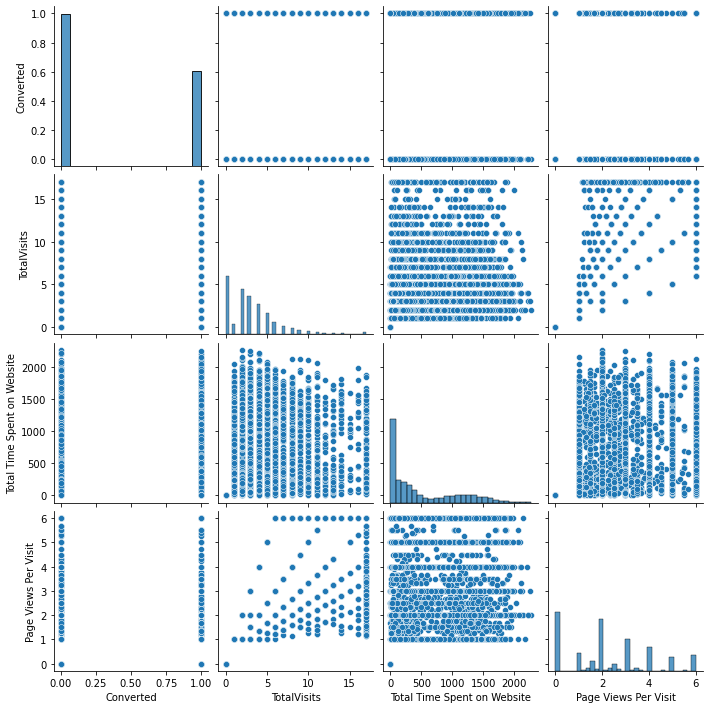

In [93]:
# Building Pair plot of numeric features 
sns.pairplot(leads_data[num])

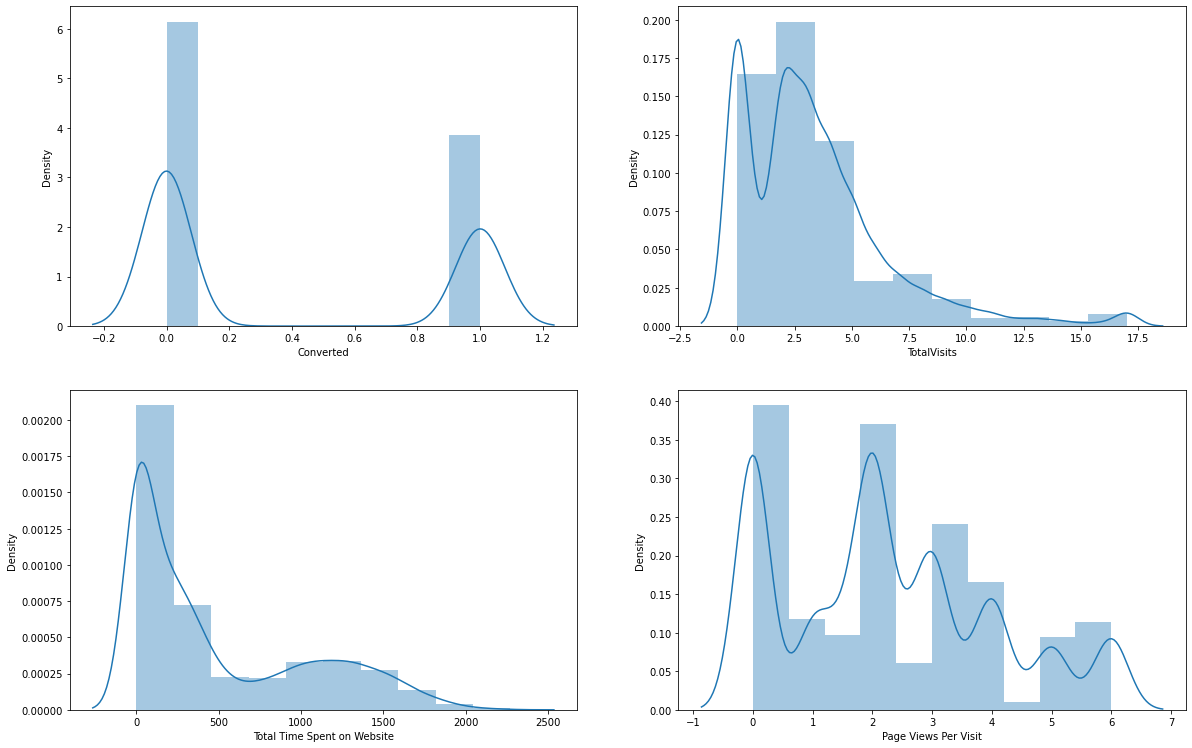

In [94]:
#Building distribution plot of numeric variables
plt.figure(figsize=(20,20))
for i in range(len(num)):
    plt.subplot(3,2,i+1)
    sns.distplot(leads_data[num[i]],bins=10)

In [95]:
#Observation:
#From the distribution plot, we can see that the spread of Total Visits & Total Time Spent per Visit both are right/positive skewed.
#It seems that most of the leads are not frequent visitors.
#their average engagement(time spent & page views per visit) on he website is slightly on a lower side.

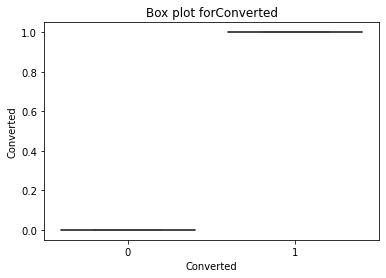

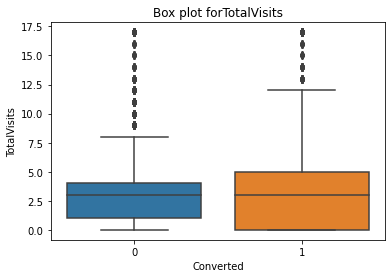

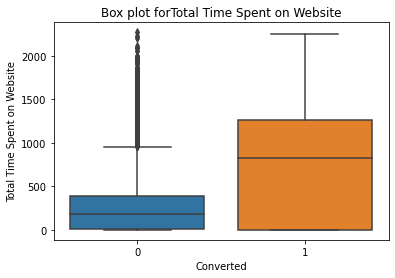

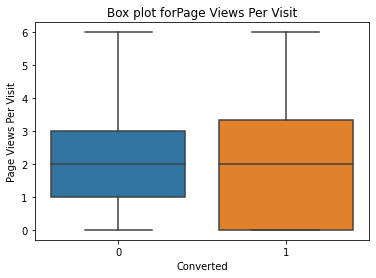

In [96]:
# Building the box plot of numeric variables
for i in num:
    sns.boxplot(x='Converted',y=i,data=leads_data)
    plt.title('Box plot for'+i)
    plt.show()


In [97]:
#observation:
#It is evident that leads who got converted have visited.
#Engaged more on the website & therefore have higher no. of visits & time spent on website compared to the non-converted leads.
#For ‘Page Views per Visit’ metric, we can say that it is slightly better for converted leads. But otherwise, there doesn’t seems to be a major difference we can notice for this metric between converted & non-converted leads.

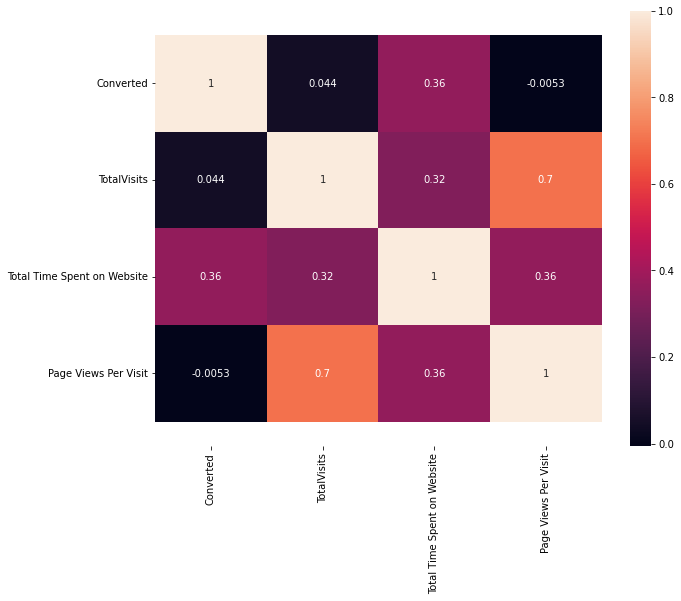

In [102]:
# Building the heatmap of correlation between the numeric variables
plt.figure(figsize = (10,8))        # Size of the figure
ax = sns.heatmap(leads_data[num].corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.25, top - 0.25)
plt.show()

In [104]:
#observation:
#In terms of correlation, from the correlation matrix, we have noticed a decent correlation of 0.7 between ‘Total Visits’ & ‘Page Views per Visit’ features. 
#Otherwise, there isn’t any major correlations we could see between the numeric variables.

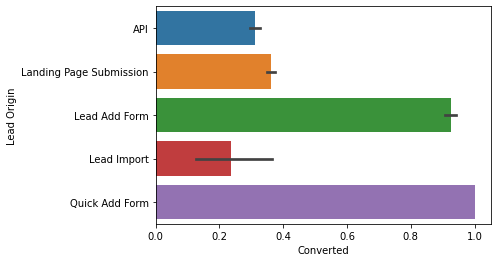

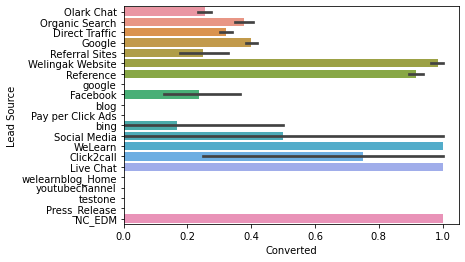

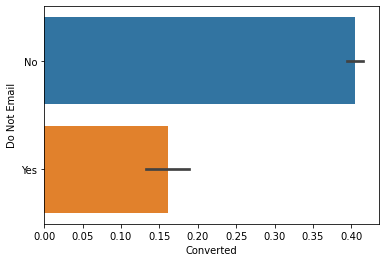

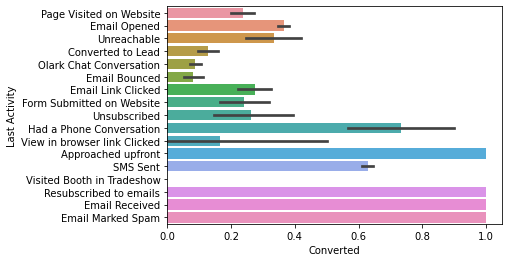

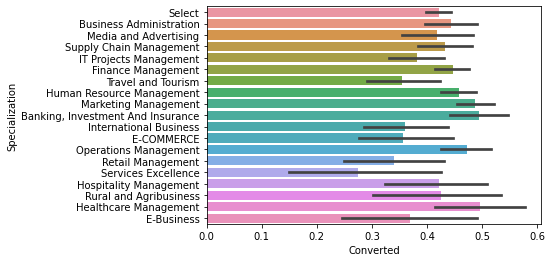

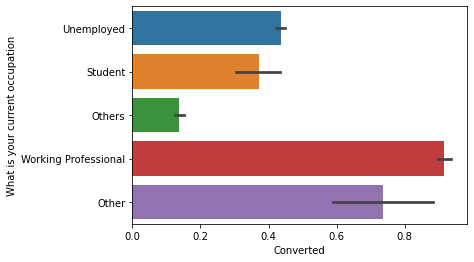

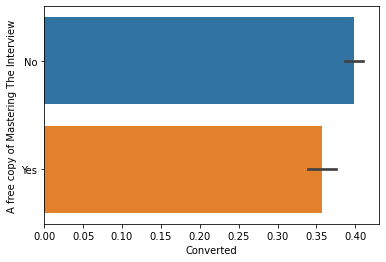

In [105]:
### Univariate analysis of categorical columns.
#Plotting conversion rates for all categorical columns
for i in range(len(cat)):
    sns.barplot(x='Converted',y=cat[i],data=leads_data)
    plt.show()

In [106]:
#Observations:
#Here, we plotted each categorical feature with respect to their respective conversion rate.
#It has been observed that ‘Working Professions’ leads have higher conversion rate than anyone else.
#Leads who have come from ‘Welingak website’ or through some ‘Reference’ had relatively higher conversion rate.
#Leads who have their specialization in ‘Healthcare Management’ or ‘Banking Investments & Insurance’ have a higher chances of conversion

# Model Building- Data Preparations

In [107]:
#Creation of Dummy Variables:
leads_dummies=pd.get_dummies(leads_data[cat],drop_first=True)
leads_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,...,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [108]:
leads_dummies.shape

(9240, 64)

In [109]:
leads_dummies.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_For

In [111]:
#concatinating the dummies with the main dataframe
Lead=pd.concat([leads_data,leads_dummies],axis=1)
Lead

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Select,...,0,1,0,0,0,0,0,1,0,0
1,660728,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Select,...,0,1,0,0,0,0,0,1,0,0
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,1,0,0,1
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,0,0,0,0,0,1,0,0
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Select,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,1,0,0
9236,579546,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,0,1,0,1
9237,579545,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,0,1,0,1
9238,579538,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,1,0,0,0,0


In [112]:
# Dropping the original columns after adding dummies 
Lead.drop(cat,axis=1,inplace=True)
Lead

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,660737,0,0.0,0,0.00,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,660728,0,5.0,674,2.50,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,660727,1,2.0,1532,2.00,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,660719,0,1.0,305,1.00,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,660681,1,2.0,1428,1.00,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,8.0,1845,2.67,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9236,579546,0,2.0,238,2.00,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9237,579545,0,2.0,199,2.00,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
9238,579538,1,3.0,499,3.00,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Test-Train Split

In [114]:
# Imorting the relevant libraries
from sklearn.model_selection import train_test_split
# Putting feature variables to X
X = Lead.drop(['Converted','Lead Number'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [115]:
# Putting response variable to y
y = Lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [116]:
# Splitting the data-test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature scaling

from sklearn.preprocessing import StandardScaler

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
#Scaling the train dataset
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
1871,-1.022595,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6795,0.205373,0.005716,-0.516439,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
3516,0.512365,-0.691418,0.143543,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8105,0.512365,1.365219,1.553761,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3934,-1.022595,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [119]:
#Scaling the test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes
4269,1.433341,0.964504,2.117849,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2376,-1.022595,-0.885371,-1.266675,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.553761,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
9199,-1.022595,-0.885371,-1.266675,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4359,-1.022595,-0.885371,-1.266675,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


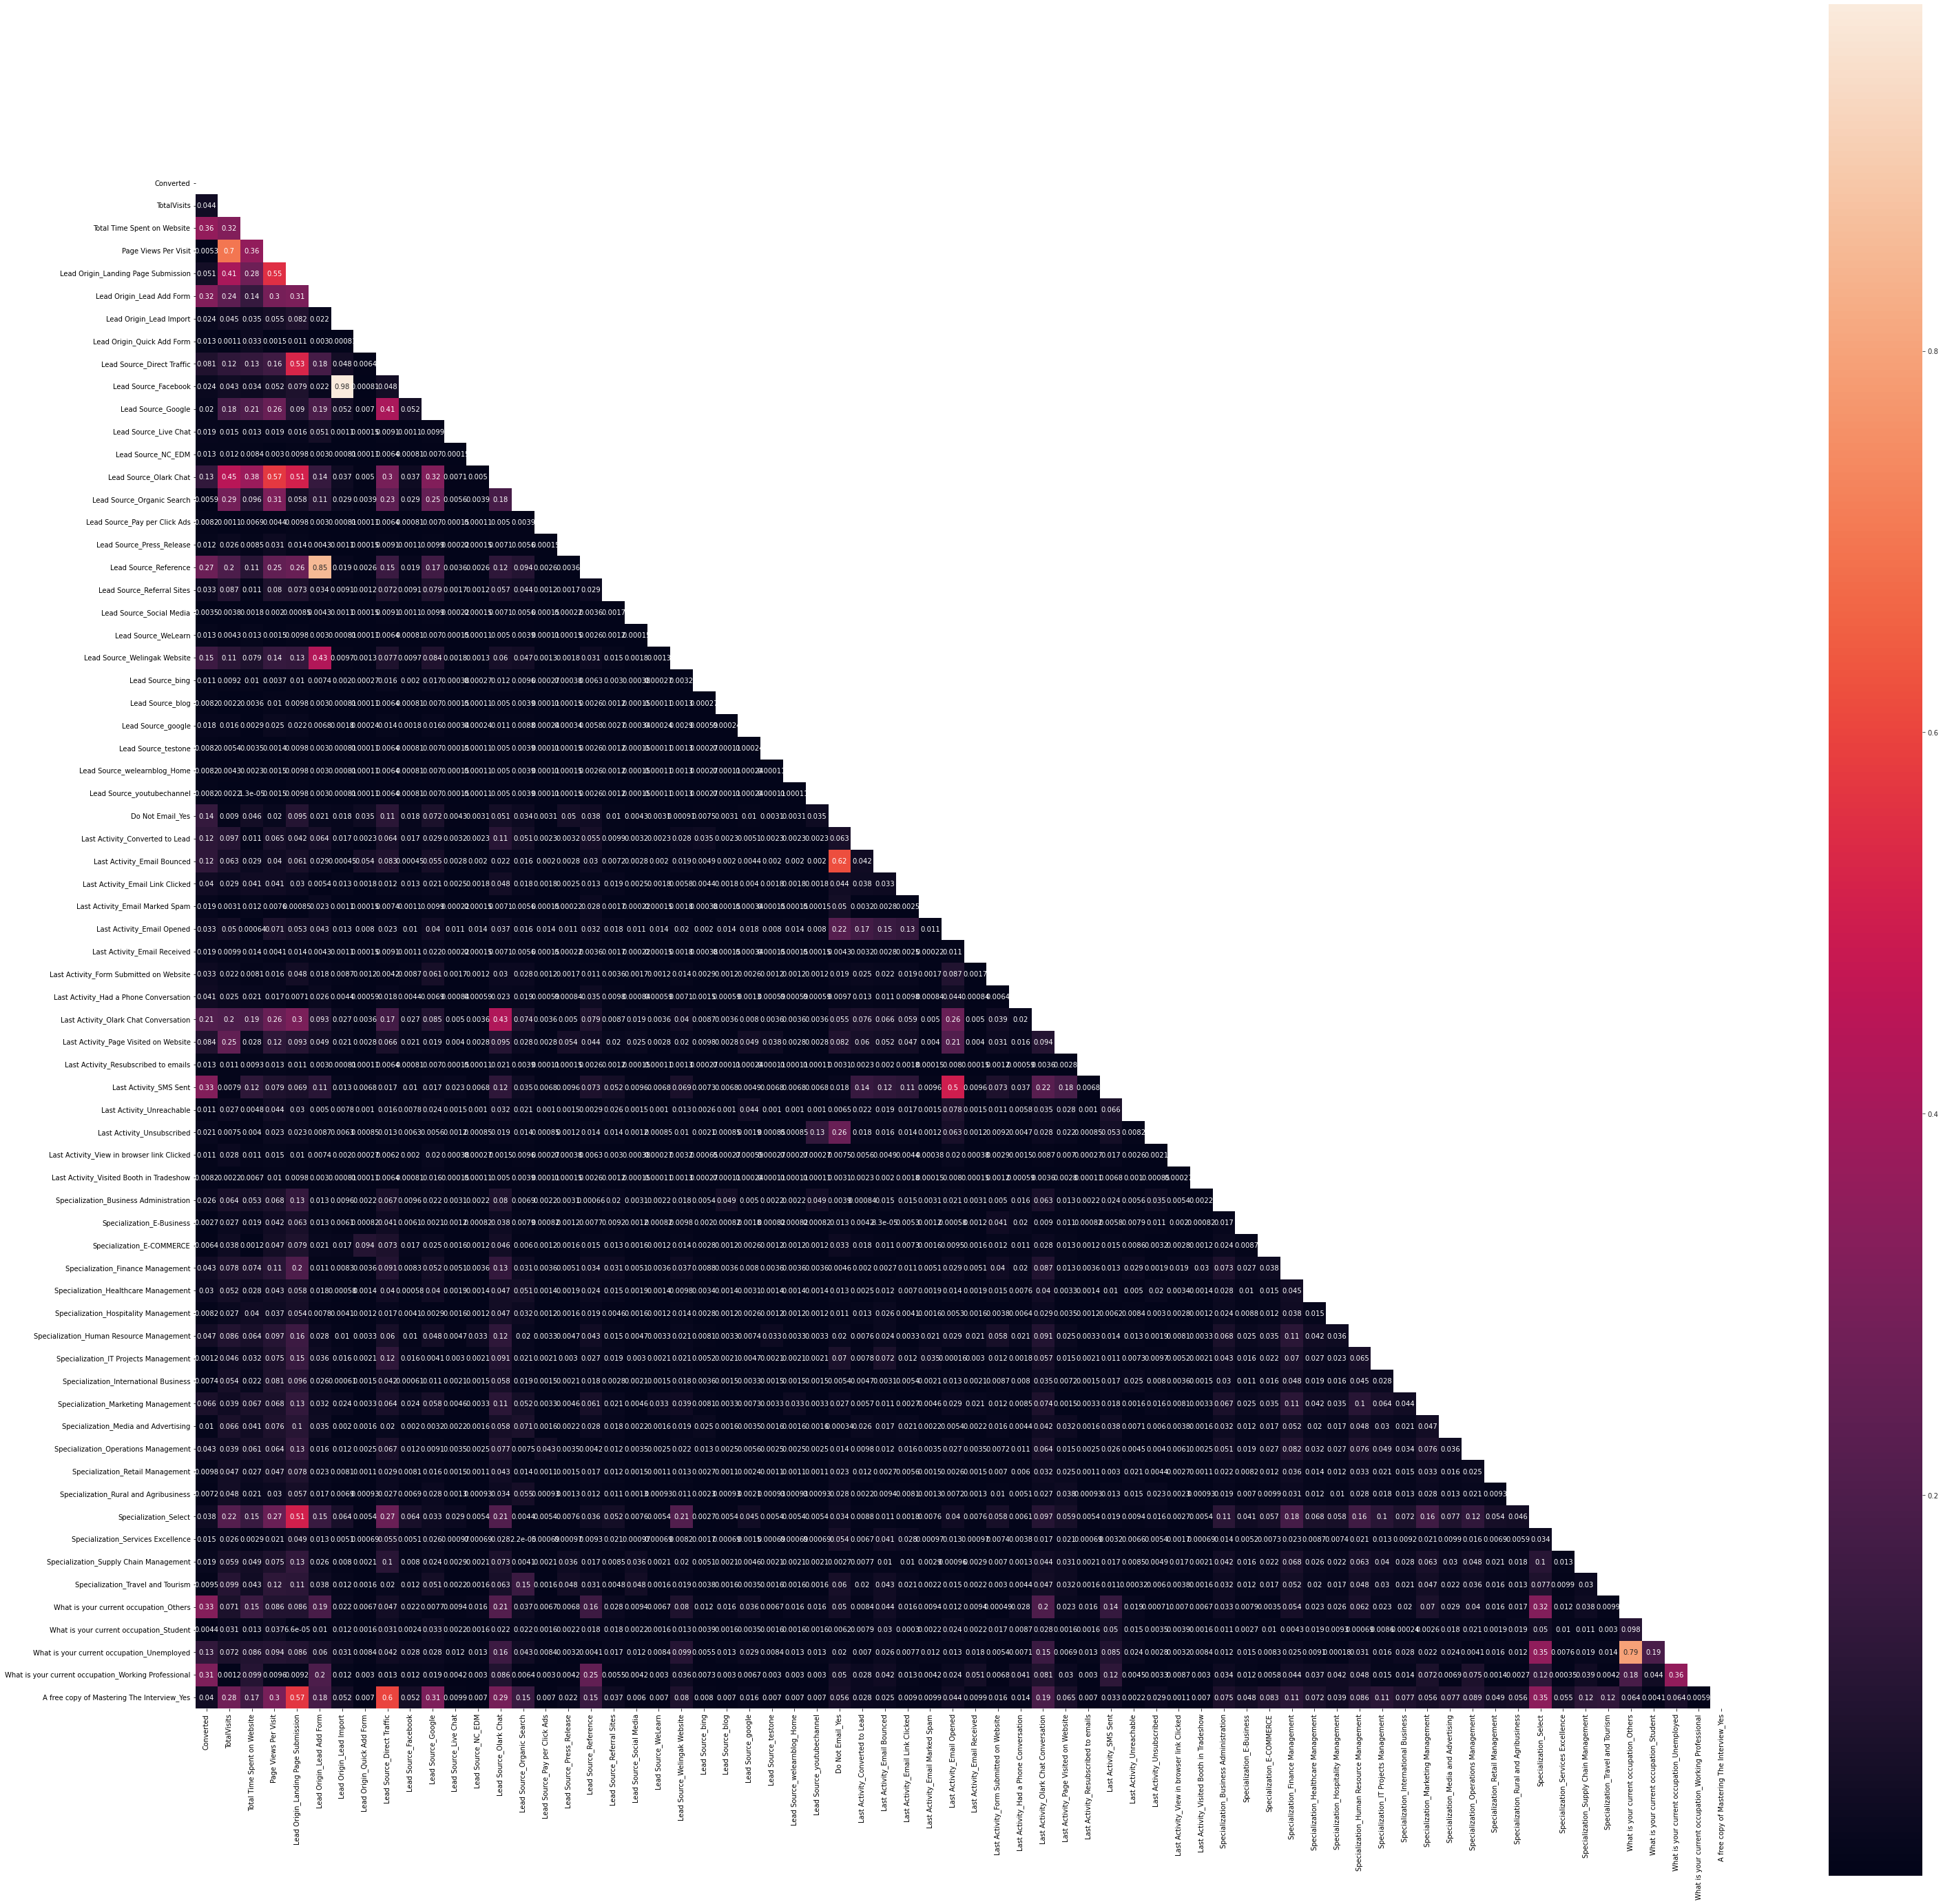

In [120]:
#In dummy variables - checking for correlations:
corr = Lead.drop(['Lead Number'],axis=1).corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 50))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, square=True);

In [121]:
# 'Specialization_Others','Lead Origin_Lead Add Form','Lead Source_Others','Last Activity_Email Bounced',What is your current occupation_Other

In [122]:
#Dropping highly correlating dummy variables for better analysis:
X_train=X_train.drop(['Specialization_Others','Lead Origin_Lead Add Form','Lead Source_Others','Last Activity_Email Bounced','What is your current occupation_Others'],axis=1)
X_test=X_test.drop(['Specialization_Others','Lead Origin_Lead Add Form','Lead Source_Others','Last Activity_Email Bounced','What is your current occupation_Others'],axis=1)

KeyError: "['Specialization_Others', 'Lead Source_Others'] not found in axis"

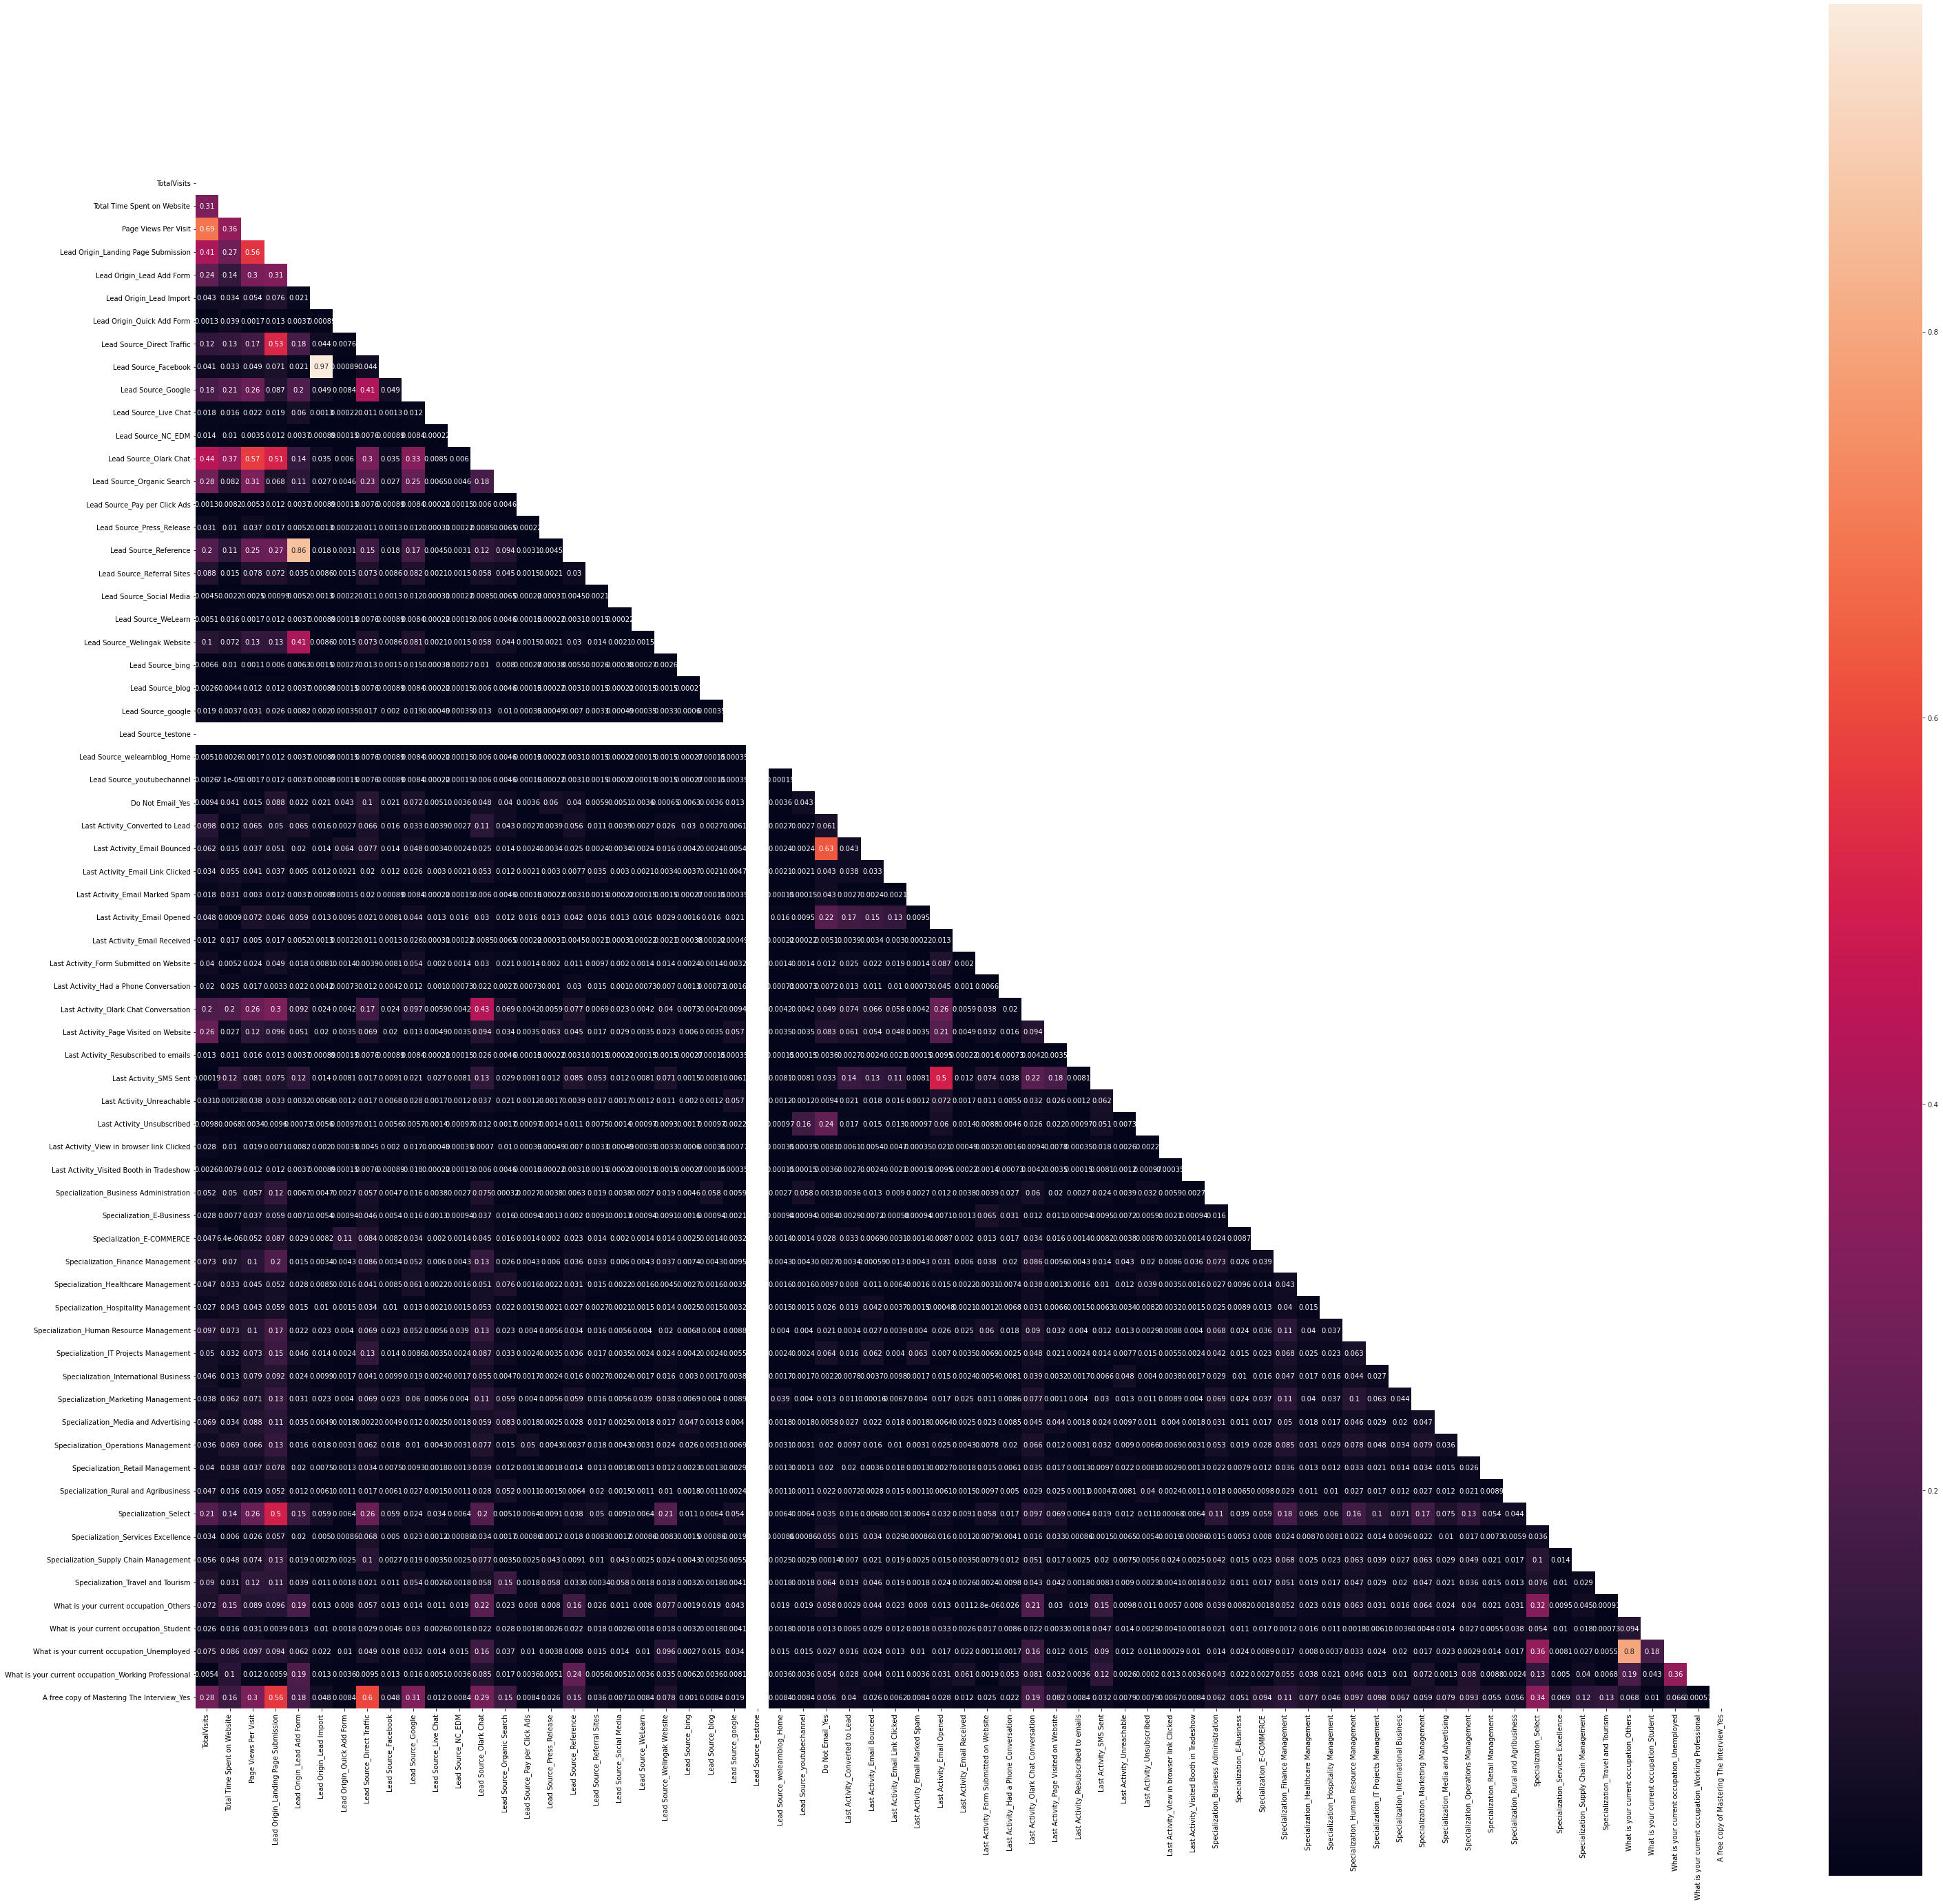

In [123]:
# check the correlation matrix again, post dropping off:
corr = X_train.corr().abs()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(50, 50))
with sns.axes_style("white"):
    ax = sns.heatmap(corr,annot=True, mask=mask, square=True);

# Model Building

In [124]:
#Importing relevant libraries
import statsmodels.api as sm

In [125]:
#Building the 1st logistic regression model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6401
Model Family:                Binomial   Df Model:                           66
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 22 Nov 2022   Deviance:                   1.6146e+05
Time:                        18:10:41   Pearson chi2:                 7.89e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                -8.234e+14   4.11e+07  -2.01e+07      0.000   -8.23e+14   -8.23e+14
TotalVisits                                           1.161e+14   1.23e+06   9.45e+07      0.000    1.16e+14    1.16e+14
Total Time Spent on Website                           7.279e+14   9.68e+05   7.52e+08      0.000    7.28e+14    7.28e+14
Page Views Per Visit                                 -1.742e+14   1.46e+06   -1.2e+08      0.000   -1.74e+14   -1.74e+14
Lead Origin_Landing Page Submission                  -2.862e+14    3.2e+06  -8.94e+07      0.000   -2.86e+14   -2.86e+14
Lead Origin_Lead Add Form                             5.594e+14   3.61e+07   1.55e+07      0.000    5.59e+14    5.59e+14
Lead Origin_Lead Import                              -1.192e+15   5.17e+07   -2.3e+07      0.000   -1.19e+15   -1.19e+15
Lead Origin_Quick Add Form                            1.286e+15   7.76e+07   1.66e+07      0.000    1.29e+15    1.29e+15
Lead Source_Direct Traffic                           -1.679e+15   3.77e+07  -4.45e+07      0.000   -1.68e+15   -1.68e+15
Lead Source_Facebook                                  7.184e+13   5.16e+07   1.39e+06      0.000    7.18e+13    7.18e+13
Lead Source_Google                                   -1.458e+15   3.77e+07  -3.87e+07      0.000   -1.46e+15   -1.46e+15
Lead Source_Live Chat                                 3.901e+15   4.91e+07   7.94e+07      0.000     3.9e+15     3.9e+15
Lead Source_NC_EDM                                    2.457e+15   7.71e+07   3.19e+07      0.000    2.46e+15    2.46e+15
Lead Source_Olark Chat                               -8.376e+14   3.76e+07  -2.22e+07      0.000   -8.38e+14   -8.38e+14
Lead Source_Organic Search                           -1.553e+15   3.78e+07  -4.11e+07      0.000   -1.55e+15   -1.55e+15
Lead Source_Pay per Click Ads                        -5.797e+15   7.71e+07  -7.52e+07      0.000    -5.8e+15    -5.8e+15
Lead Source_Press_Release                            -5.871e+15    6.1e+07  -9.62e+07      0.000   -5.87e+15   -5.87e+15
Lead Source_Reference                                -6.818e+14   1.32e+07  -5.17e+07      0.000   -6.82e+14   -6.82e+14
Lead Source_Referral Sites                           -1.762e+15   3.83e+07   -4.6e+07      0.000   -1.76e+15   -1.76e+15
Lead Source_Social Media                             -1.522e+15   6.08e+07   -2.5e+07      0.000   -1.52e+15   -1.52e+15
Lead Source_WeLearn                                   1.687e+15   7.71e+07   2.19e+07      0.000    1.69e+15    1.69e+15
Lead Source_Welingak Website                           8.47e+13   1.45e+07   5.85e+06      0.000    8.47e+13    8.47e+13
Lead Source_bing                                     -6.42

In [126]:
#Feature selection using RFE for model 1
#Importing relevant libraries
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [127]:
#Running RFE on train dataset to get the top 15 statistical significant features
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe=rfe.fit(X_train,y_train)

In [128]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
        True, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False])

In [129]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Origin_Quick Add Form', False, 41),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 16),
 ('Lead Source_WeLearn', False, 31),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_blog', False, 39),
 ('Lead Source_google', False, 11),
 ('Lead Source_testone', False, 48),
 ('Lead Sou

In [130]:
(rfe.support_==True).sum()

20

In [131]:
(rfe.support_==False).sum()

47

In [132]:
X_train.columns[rfe.support_]

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Select', 'What is your current occupation_Others',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [133]:
#Train dataset after performing RFE
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Hospitality Management,Specialization_Select,What is your current occupation_Others,What is your current occupation_Working Professional
1871,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0.005716,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3516,-0.691418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8105,1.365219,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3934,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,-0.885371,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,0.404601,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8039,-0.885371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6936,-0.449891,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [134]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Busines

In [135]:
#Using Stats model, we shall do futher analysis:
#Importing relevant libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [137]:
#Building the 2nd model
X_train_sm = sm.add_constant(X_train_rfe)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.6
Date:                Tue, 22 Nov 2022   Deviance:                       5251.2
Time:                        18:15:31   Pearson chi2:                 8.53e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4040
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5184      0.121      4.300      0.000       0.282       0.755
Total Time Spent on Website                              1.0677      0.040     26.831      0.000       0.990       1.146
Lead Origin_Landing Page Submission                     -0.5387      0.116     -4.664      0.000      -0.765      -0.312
Lead Origin_Lead Add Form                                1.9437      0.199      9.755      0.000       1.553       2.334
Lead Source_Direct Traffic                              -1.2742      0.147     -8.681      0.000      -1.562      -0.986
Lead Source_Facebook                                    -1.6055      0.520     -3.085      0.002      -2.626      -0.586
Lead Source_Google                                      -0.9575      0.124     -7.693      0.000      -1.201      -0.714
Lead Source_Organic Search                              -1.1123      0.146     -7.624      0.000      -1.398      -0.826
Lead Source_Referral Sites                              -1.1794      0.321     -3.670      0.000      -1.809      -0.550
Lead Source_Welingak Website                             2.2227      0.746      2.980      0.003       0.761       3.684
Do Not Email_Yes                                        -1.4745      0.174     -8.464      0.000      -1.816      -1.133
Last Activity_Converted to Lead                         -1.1928      0.219     -5.445      0.000      -1.622      -0.763
Last Activity_Had a Phone Conversation                   2.1024      0.684      3.073      0.002       0.761       3.443
Last Activity_Olark Chat Conversation                   -1.2683      0.168     -7.547      0.000      -1.598      -0.939
Last Activity_Resubscribed to emails                    22.4019   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                                   1.2471      0.075     16.572      0.000       1.100       1.395
Last Activity_Unsubscribed                               1.0168      0.473      2.148      0.032       0.089       1.944
Specialization_Hospitality Management                   -0.8755      0.327     -2.678      0.007      -1.516      -0.235
Specialization_Select                                   -0.5625      0.114     -4.925      0.000      -0.786      -0.339
What is your current occupation_Others                  -1.4088      0.098    -14.359      0.000      -1.601      -1.217
What is your current occupation_Working Professional     2.4536      0.189     12.977      0.000       2.083       2.824
========================================================================================================================
"""

In [138]:
#checking the VIF of the featuers in the model
checkVIF(X_train_sm)

,Features,VIF
0,const,12.74
4,Lead Source_Direct Traffic,3.64
6,Lead Source_Google,2.88
2,Lead Origin_Landing Page Submission,2.75
7,Lead Source_Organic Search,1.99
18,Specialization_Select,1.86
3,Lead Origin_Lead Add Form,1.80
19,What is your current occupation_Others,1.49
13,Last Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27


In [139]:
#Model 3- strategy used:
# drop column 'Last Activity_Resubscribed to emails	' due to high p value
X_train_rfe2=X_train_rfe.drop('Last Activity_Resubscribed to emails',axis=1)

In [140]:
#Bulding the 3rd model
X_train_sm2=sm.add_constant(X_train_rfe2)
logm3=sm.GLM(y_train,X_train_sm2,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2627.6
Date:                Tue, 22 Nov 2022   Deviance:                       5255.2
Time:                        18:16:47   Pearson chi2:                 8.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4036
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5249      0.120      4.357      0.000       0.289       0.761
Total Time Spent on Website                              1.0673      0.040     26.826      0.000       0.989       1.145
Lead Origin_Landing Page Submission                     -0.5401      0.115     -4.677      0.000      -0.766      -0.314
Lead Origin_Lead Add Form                                1.9388      0.199      9.732      0.000       1.548       2.329
Lead Source_Direct Traffic                              -1.2789      0.147     -8.717      0.000      -1.566      -0.991
Lead Source_Facebook                                    -1.6107      0.520     -3.095      0.002      -2.631      -0.591
Lead Source_Google                                      -0.9624      0.124     -7.736      0.000      -1.206      -0.719
Lead Source_Organic Search                              -1.1169      0.146     -7.659      0.000      -1.403      -0.831
Lead Source_Referral Sites                              -1.1844      0.321     -3.687      0.000      -1.814      -0.555
Lead Source_Welingak Website                             2.2240      0.746      2.982      0.003       0.762       3.686
Do Not Email_Yes                                        -1.4752      0.174     -8.469      0.000      -1.817      -1.134
Last Activity_Converted to Lead                         -1.1933      0.219     -5.449      0.000      -1.623      -0.764
Last Activity_Had a Phone Conversation                   2.1012      0.684      3.071      0.002       0.760       3.442
Last Activity_Olark Chat Conversation                   -1.2733      0.168     -7.579      0.000      -1.603      -0.944
Last Activity_SMS Sent                                   1.2454      0.075     16.556      0.000       1.098       1.393
Last Activity_Unsubscribed                               1.0152      0.473      2.145      0.032       0.088       1.943
Specialization_Hospitality Management                   -0.8758      0.327     -2.679      0.007      -1.517      -0.235
Specialization_Select                                   -0.5652      0.114     -4.950      0.000      -0.789      -0.341
What is your current occupation_Others                  -1.4054      0.098    -14.336      0.000      -1.598      -1.213
What is your current occupation_Working Professional     2.4533      0.189     12.975      0.000       2.083       2.824
========================================================================================================================
"""

In [141]:
#checking the VIF of the featuers in the model
checkVIF(X_train_sm2)

,Features,VIF
0,const,12.73
4,Lead Source_Direct Traffic,3.64
6,Lead Source_Google,2.88
2,Lead Origin_Landing Page Submission,2.75
7,Lead Source_Organic Search,1.99
17,Specialization_Select,1.86
3,Lead Origin_Lead Add Form,1.79
18,What is your current occupation_Others,1.49
13,Last Activity_Olark Chat Conversation,1.32
1,Total Time Spent on Website,1.27


In [143]:
#Observation:
#All variables have a good value of VIF. 
#So we need not drop any more variables and we can proceed with making predictions using this model only

In [144]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm2)
y_train_pred[:10]

1871    0.396504
6795    0.135511
3516    0.314702
8105    0.848772
3934    0.271854
4844    0.987787
3297    0.128862
8071    0.998818
987     0.068392
7423    0.912949
dtype: float64

In [145]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3965044 , 0.1355109 , 0.31470248, 0.84877161, 0.2718544 ,
       0.98778684, 0.12886247, 0.99881774, 0.06839208, 0.91294938])

# Model Evaluation:

Creating a dataframe with the actual converted column and the predicted convertion probabilities

In [146]:

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})

y_train_pred_final.head()

,Converted,Lead_Score
0,0,0.396504
1,0,0.135511
2,0,0.314702
3,0,0.848772
4,0,0.271854


Creating new column 'predicted' with 1 if Lead_Score > 0.5 else 0

In [147]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Lead_Score,predicted
0,0,0.396504,0
1,0,0.135511,0
2,0,0.314702,0
3,0,0.848772,1
4,0,0.271854,0


In [148]:
from sklearn import metrics

In [149]:
#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3558,  444],
       [ 724, 1742]], dtype=int64)

In [150]:
#Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8194186765615337


In [151]:
# Checking Recall.
# Recall=TP/(TP+FN)
1742/(1742+724)

0.7064071370640713

# Checking on other metrics for deeper analysis & accuracy:

In [152]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7064071370640713

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.889055472263868

In [155]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11094452773613193


In [156]:
# positive predictive value 
print (TP / float(TP+FP))

0.7968892955169259


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8309201307800094


# Plotting the ROC Curve

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

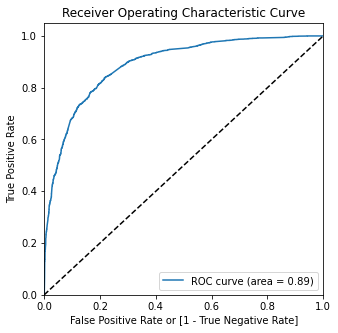

In [160]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

In [161]:
#Observations:
#High Area under curve of 0.88 indicated the good performance of present model
#And our graph is leaned towards the left side of the border which means we have good accuracy.

# Finding Optimal Cutoff Point

In [162]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.396504,0,1,1,1,1,0,0,0,0,0,0
1,0,0.135511,0,1,1,0,0,0,0,0,0,0,0
2,0,0.314702,0,1,1,1,1,0,0,0,0,0,0
3,0,0.848772,1,1,1,1,1,1,1,1,1,1,0
4,0,0.271854,0,1,1,1,0,0,0,0,0,0,0


In [163]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.617038  0.977291  0.395052
0.2   0.2  0.761286  0.914436  0.666917
0.3   0.3  0.801948  0.843471  0.776362
0.4   0.4  0.811534  0.764396  0.840580
0.5   0.5  0.819419  0.706407  0.889055
0.6   0.6  0.805504  0.615572  0.922539
0.7   0.7  0.784168  0.521492  0.946027
0.8   0.8  0.764842  0.434712  0.968266
0.9   0.9  0.720470  0.288321  0.986757


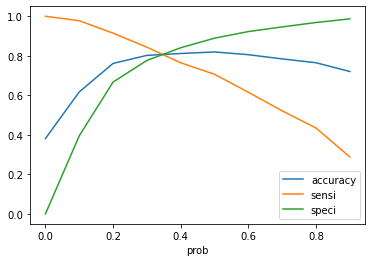

In [164]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [166]:
#Observation:
#From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [167]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.396504,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.135511,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.314702,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.848772,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.271854,0,1,1,1,0,0,0,0,0,0,0,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8078231292517006

In [169]:
# Confusion Matrix for the optimal cut-off of 0.35
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3216,  786],
       [ 457, 2009]], dtype=int64)

In [170]:
# Confusion Matrix for the optimal cut-off of 0.35
# Predicted          0        1
# Actual
#  0               3216     786
#  1               457     2009  

In [171]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [172]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8146796431467964

In [173]:
#alculation for Specificity
TN / float(TN+FP)

0.8035982008995503

In [174]:
# Positive predictive value 
print (TP / float(TP+FP))

0.718783542039356


In [175]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8755785461475633


In [176]:
#Recall & Precision:
#Confusion Matrix for an optimal cut-off of 0.35
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3216,  786],
       [ 457, 2009]], dtype=int64)

In [177]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [178]:
#Precision
TP / TP + FP

787.0

In [179]:
TP/(TP+FP) #in %

0.718783542039356

In [180]:
# Recall
TP/(TP+FN)

0.8146796431467964

In [181]:
#Observation:
#Our one of the Business Objectives was to achieve a Recall of 80% which means that the business wanted most of the hot leads to be identified so that the sales team can take appropriate actions to convert those hot leads.
#Therefore, our final model is now apt enough to identify all such hot leads for the sales team.

# Making Predictions (on the Test dataset)

In [182]:
col=X_train_rfe2.columns

In [183]:
X_test_rfe2=X_test[col]

In [184]:
X_test_sm = sm.add_constant(X_test_rfe2)

In [185]:
y_test_pred = res.predict(X_test_sm)

In [186]:
y_test_pred[:10]

4269    0.528824
2376    0.900159
7766    0.766034
9199    0.094619
4359    0.820359
9186    0.626703
1631    0.513952
8963    0.194000
8007    0.020847
5324    0.409842
dtype: float64

In [187]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [188]:
y_pred_1.rename(columns={0:'Lead_Score'},inplace=True)
y_pred_1

,Lead_Score
4269,0.528824
2376,0.900159
7766,0.766034
9199,0.094619
4359,0.820359
...,...
8649,0.044021
2152,0.900159
7101,0.271854
5331,0.121392


In [189]:
y_pred_final = pd.concat([y_test, y_pred_1],axis=1)
y_pred_final

,Converted,Lead_Score
4269,1,0.528824
2376,1,0.900159
7766,1,0.766034
9199,0,0.094619
4359,1,0.820359
...,...,...
8649,0,0.044021
2152,1,0.900159
7101,0,0.271854
5331,0,0.121392


In [191]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Lead_Score,final_predicted
4269,1,0.528824,1
2376,1,0.900159,1
7766,1,0.766034,1
9199,0,0.094619,0
4359,1,0.820359,1
...,...,...,...
8649,0,0.044021,0
2152,1,0.900159,1
7101,0,0.271854,0
5331,0,0.121392,0


In [192]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.814935064935065

In [193]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1368,  309],
       [ 204,  891]], dtype=int64)

In [194]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [195]:
# Precision of test dataset
TP/(TP+FP)

0.7425

In [196]:
#Recall of test set
TP / (TP + FN)

0.8136986301369863

In [ ]:
#Observation:
The results shows that our model is very much stable even on unknown datasets.